<div align="center" style = "font-family : Times New Roman; font-size : 20px"><B>K. J. Somaiya College of Engineering, Mumbai-77</B></div>
<div align="center" style = "font-family : Time NewRoman; font-size : 15px">(Autonomous College Affiliated to University of Mumbai)</div>

<div align="center" style = "font-family : Time New Roman; font-size : 20px">Expolatory Data Analysis </div>

<div align="left" style = "font-family : Time New Roman; font-size : 20px; color : red; "><B>Name : Anurag Pulak Ghosh &nbsp;&nbsp;&nbsp;&nbsp; Roll No.: 1914019 &nbsp;&nbsp;&nbsp;&nbsp; Branch : Information Technology &nbsp;&nbsp;&nbsp;&nbsp; Class : A &nbsp; &nbsp;&nbsp;&nbsp; Batch : A2</div>

<h1 align="center" style = "font-family : Time New Roman; ">Experiment No.-3 : Predicting missing data using Regression</h1>

In [1]:
#importing all the required libraries.
import numpy as np #numpy and pandas for numerical analysis. 
import pandas as pd
import matplotlib.pyplot as mplt #matplotlib for data visualization.

In [2]:
#reading the dataset file.
fish_data = pd.read_csv("Fish.csv")

In [3]:
#Displaying the size of the dataset.
fish_data.shape

(159, 7)

In [4]:
#Displaying the info for the dataset.
fish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [5]:
#displaying the dataset.
fish_data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [6]:
#Displaying the data types of the dataset.
fish_data.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [7]:
#Displaying the top 5 rows of the dataset.
fish_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [8]:
#Displaying the last 5 rows of the dataset.
fish_data.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


<h1>1. Simple Linear Regression</h1>

<h3>Considering Height of fishes as a function of Weight of fishes</h3>

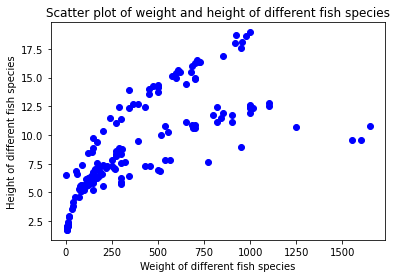

In [9]:
#Plotting the scatter plot for Weight and Height of the dataset.
mplt.scatter(fish_data["Weight"],fish_data["Height"],color='b')
mplt.xlabel('Weight of different fish species')
mplt.ylabel('Height of different fish species')
mplt.title("Scatter plot of weight and height of different fish species")
mplt.show() 

In [10]:
#Extracting the X and Y variables.
Xvariate = fish_data["Weight"].to_numpy()
Yvariate = fish_data["Height"].to_numpy()

In [11]:
#Displaying the X array values.
Xvariate

array([ 242. ,  290. ,  340. ,  363. ,  430. ,  450. ,  500. ,  390. ,
        450. ,  500. ,  475. ,  500. ,  500. ,  340. ,  600. ,  600. ,
        700. ,  700. ,  610. ,  650. ,  575. ,  685. ,  620. ,  680. ,
        700. ,  725. ,  720. ,  714. ,  850. , 1000. ,  920. ,  955. ,
        925. ,  975. ,  950. ,   40. ,   69. ,   78. ,   87. ,  120. ,
          0. ,  110. ,  120. ,  150. ,  145. ,  160. ,  140. ,  160. ,
        169. ,  161. ,  200. ,  180. ,  290. ,  272. ,  390. ,  270. ,
        270. ,  306. ,  540. ,  800. , 1000. ,   55. ,   60. ,   90. ,
        120. ,  150. ,  140. ,  170. ,  145. ,  200. ,  273. ,  300. ,
          5.9,   32. ,   40. ,   51.5,   70. ,  100. ,   78. ,   80. ,
         85. ,   85. ,  110. ,  115. ,  125. ,  130. ,  120. ,  120. ,
        130. ,  135. ,  110. ,  130. ,  150. ,  145. ,  150. ,  170. ,
        225. ,  145. ,  188. ,  180. ,  197. ,  218. ,  300. ,  260. ,
        265. ,  250. ,  250. ,  300. ,  320. ,  514. ,  556. ,  840. ,
      

In [12]:
#Displaying the Y array values.
Yvariate

array([11.52  , 12.48  , 12.3778, 12.73  , 12.444 , 13.6024, 14.1795,
       12.67  , 14.0049, 14.2266, 14.2628, 14.3714, 13.7592, 13.9129,
       14.9544, 15.438 , 14.8604, 14.938 , 15.633 , 14.4738, 15.1285,
       15.9936, 15.5227, 15.4686, 16.2405, 16.36  , 16.3618, 16.517 ,
       16.8896, 18.957 , 18.0369, 18.084 , 18.7542, 18.6354, 17.6235,
        4.1472,  5.2983,  5.5756,  5.6166,  6.216 ,  6.4752,  6.1677,
        6.1146,  5.8045,  6.6339,  7.0334,  6.55  ,  6.4   ,  7.5344,
        6.9153,  7.3968,  7.0866,  8.8768,  8.568 ,  9.485 ,  8.3804,
        8.1454,  8.778 , 10.744 , 11.7612, 12.354 ,  6.8475,  6.5772,
        7.4052,  8.3922,  8.8928,  8.5376,  9.396 ,  9.7364, 10.3458,
       11.088 , 11.368 ,  2.112 ,  3.528 ,  3.824 ,  4.5924,  4.588 ,
        5.2224,  5.1992,  5.6358,  5.1376,  5.082 ,  5.6925,  5.9175,
        5.6925,  6.384 ,  6.11  ,  5.64  ,  6.11  ,  5.875 ,  5.5225,
        5.856 ,  6.792 ,  5.9532,  5.2185,  6.275 ,  7.293 ,  6.375 ,
        6.7334,  6.4

#### For Linear Regression, considering that X is the independent variable and Y is dependent on X, the slope is given by w1 and intercept by w0

In [13]:
#Function to calculate the slope and intercept by using Simple Linear Regression.
def simpleLinearRegression(Xvariable, Yvariable):
    Xi=Xvariable
    Yi=Yvariable
    N=len(Xi)
    
    Xi_mean=Xi.mean()
    Yi_mean=Yi.mean()
    
    Sum_XiYi=(Xi*Yi).sum()
    Sum_XiYiByN=(Yi.sum()*Xi.sum())/N
    
    Sum_Xi2=(Xi*Xi).sum()
    Sum_Xi2ByN=(Xi.sum()*Xi.sum())/N
    
    w1=(Sum_XiYi-Sum_XiYiByN)/(Sum_Xi2-Sum_Xi2ByN)
    
    w0=Yi_mean-w1*Xi_mean
    return w0, w1

In [14]:
#Calling the function and displaying the slope and intercept
w0,w1 = simpleLinearRegression(Xvariate, Yvariate)
print("Slope(w1) =",w1,"Intercept(w0) =",w0)

Slope(w1) = 0.008672856220501398 Intercept(w0) = 5.516365983750859


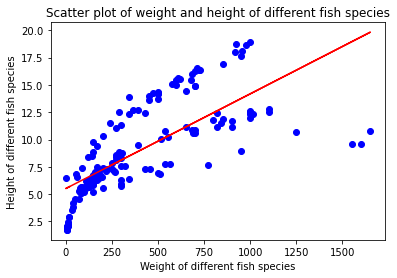

In [15]:
mplt.scatter(fish_data["Weight"],fish_data["Height"],color='b')
mplt.plot(fish_data["Weight"], w1*fish_data["Weight"]+w0,'-r')
mplt.xlabel('Weight of different fish species')
mplt.ylabel('Height of different fish species')
mplt.title("Scatter plot of weight and height of different fish species")
mplt.show() 

In [16]:
def test(w0,w1,x):
    y = w0 + w1*x
    return y

In [17]:
X_test=Xvariate[50:150]
Y_test=Yvariate[50:150]

In [18]:
prediction = test(w0,w1,X_test)
print(prediction )

[ 7.25093723  7.0774801   8.03149429  7.87538288  8.89877991  7.85803716
  7.85803716  8.17025999 10.19970834 12.45465096 14.1892222   5.99337308
  6.03673736  6.29692304  6.55710873  6.81729442  6.73056585  6.99075154
  6.77393014  7.25093723  7.88405573  8.11822285  5.56753584  5.79389738
  5.86328023  5.96301808  6.12346592  6.38365161  6.19284877  6.21019448
  6.25355876  6.25355876  6.47038017  6.51374445  6.60047301  6.64383729
  6.55710873  6.55710873  6.64383729  6.68720157  6.47038017  6.64383729
  6.81729442  6.77393014  6.81729442  6.99075154  7.46775863  6.77393014
  7.14686295  7.0774801   7.22491866  7.40704864  8.11822285  7.7713086
  7.81467288  7.68458004  7.68458004  8.11822285  8.29167997  9.97421408
 10.33847404 12.80156521 11.45727249 11.58736534 11.58736534 11.50063678
 13.32193658 11.15372253 12.62810808 12.88829377 13.32193658 14.31931505
 12.62810808 15.05650783 14.1892222  15.05650783 14.1892222  14.1892222
  7.25093723  8.11822285  8.11822285  8.11822285  9.2

In [19]:
compare = pd.DataFrame({'Actual Height':Y_test,'Predicted Height':prediction})
compare

,Actual Height,Predicted Height
0,7.3968,7.250937
1,7.0866,7.077480
2,8.8768,8.031494
3,8.5680,7.875383
4,9.4850,8.898780
...,...,...
95,1.7388,5.574474
96,1.9720,5.581412
97,1.7284,5.577076
98,2.1960,5.600493


In [20]:
#Calculating the Sum of Squares error(SSE) for the dataset
def residualSumOfSquares(Y_test,prediction):
    residual = Y_test - prediction
    RSS = (residual*residual).sum()
    return RSS

In [21]:
#Displaying the error for the dataset
RSS=residualSumOfSquares(Y_test,prediction)
print("RSS =",RSS)

RSS = 616.2434115017323


In [22]:
#Calculating the Total Sum of Squares error(SSTO) for the dataset
def totalSumOfSquares(Y_test,prediction):
    residual = Y_test - np.mean(Y_test)
    SSTO = (residual*residual).sum()
    return SSTO

In [23]:
#Displaying the Total Sum of Squares error for the dataset
SSTO=totalSumOfSquares(Y_test,prediction)
print(SSTO)

764.6448592899001


In [24]:
r2=1-(RSS/SSTO)
print("r2 =",r2)

r2 = 0.19407891910237018


In [25]:
#Calculating the Total Sum of Squares error(SSTO) for the dataset
def rootMeanSquare(Y_test,prediction):
    Squared_meanResidual = np.mean((Y_test - prediction)**2)
    RMSE = (Squared_meanResidual)**(0.5)
    return RMSE

In [26]:
#Displaying the Total Sum of Squares error for the dataset
RMSE=rootMeanSquare(Y_test,prediction)
print("RMSE =",RMSE)

RMSE = 2.482425047210353


In [27]:
#Calculating the Mean Absolute Percentage error(MAPE) for the dataset
def MeanAbsolutePercentageError(Y_test,prediction):
    error=abs((Y_test-prediction)/Y_test).sum()
    MAPE=(error/len(Y_test))*100
    return MAPE

In [28]:
#Displaying the Total Sum of Squares error for the dataset
MAPE=MeanAbsolutePercentageError(Y_test,prediction)
print("MAPE =",MAPE)

MAPE = 29.919294967643417


In [29]:
efficiency=100-MAPE
print("Efficiency =",efficiency)

Efficiency = 70.08070503235658


<h1>2. Multiple Linear Regression</h1>

<h4>Case A : Considering the Height of fishes as a function of Length1 and Weight</h4>

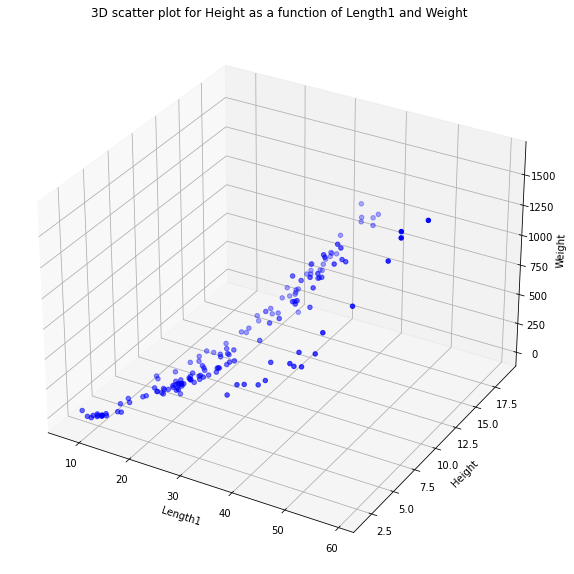

In [30]:
fig = mplt.figure()
ax = fig.add_subplot(111, projection='3d')

x =fish_data["Length1"]
y =fish_data["Height"]
z =fish_data["Weight"]


ax.scatter(x, y, z, c='b', marker='o')

ax.set_xlabel('Length1')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
fig.set_size_inches(10, 10)
mplt.title("3D scatter plot for Height as a function of Length1 and Weight")
mplt.show()

In [31]:
X=fish_data.drop(['Species','Length2','Length3','Height','Width'],axis=1)
X.insert(0,'',1)
X

,,Weight,Length1
0,1,242.0,23.2
1,1,290.0,24.0
2,1,340.0,23.9
3,1,363.0,26.3
4,1,430.0,26.5
...,...,...,...
154,1,12.2,11.5
155,1,13.4,11.7
156,1,12.2,12.1
157,1,19.7,13.2


In [32]:
Y=np.array(fish_data["Height"])
Y

array([11.52  , 12.48  , 12.3778, 12.73  , 12.444 , 13.6024, 14.1795,
       12.67  , 14.0049, 14.2266, 14.2628, 14.3714, 13.7592, 13.9129,
       14.9544, 15.438 , 14.8604, 14.938 , 15.633 , 14.4738, 15.1285,
       15.9936, 15.5227, 15.4686, 16.2405, 16.36  , 16.3618, 16.517 ,
       16.8896, 18.957 , 18.0369, 18.084 , 18.7542, 18.6354, 17.6235,
        4.1472,  5.2983,  5.5756,  5.6166,  6.216 ,  6.4752,  6.1677,
        6.1146,  5.8045,  6.6339,  7.0334,  6.55  ,  6.4   ,  7.5344,
        6.9153,  7.3968,  7.0866,  8.8768,  8.568 ,  9.485 ,  8.3804,
        8.1454,  8.778 , 10.744 , 11.7612, 12.354 ,  6.8475,  6.5772,
        7.4052,  8.3922,  8.8928,  8.5376,  9.396 ,  9.7364, 10.3458,
       11.088 , 11.368 ,  2.112 ,  3.528 ,  3.824 ,  4.5924,  4.588 ,
        5.2224,  5.1992,  5.6358,  5.1376,  5.082 ,  5.6925,  5.9175,
        5.6925,  6.384 ,  6.11  ,  5.64  ,  6.11  ,  5.875 ,  5.5225,
        5.856 ,  6.792 ,  5.9532,  5.2185,  6.275 ,  7.293 ,  6.375 ,
        6.7334,  6.4

In [33]:
def train_multiple_linear_regression(X,Y):
    Xt=np.transpose(X)
    XtX=Xt.dot(X)
    inv=np.linalg.inv(XtX)
    b=(inv.dot(Xt)).dot(Y)
    return b

In [34]:
a=train_multiple_linear_regression(X,Y)
a

array([ 7.13337817,  0.01124724, -0.10067584])

In [35]:
def predict_multiple_linear_regression(b,X):
    return X.dot(b)

In [36]:
p=predict_multiple_linear_regression(a,X)
p

0      7.519530
1      7.978857
2      8.551286
3      8.568350
4      9.301780
         ...   
154    6.112822
155    6.106184
156    6.052417
157    6.026028
158    5.967872
Length: 159, dtype: float64

In [37]:
comparison = pd.DataFrame({'Actual Weight':Y,'Predicted Weight':p})
comparison

,Actual Weight,Predicted Weight
0,11.5200,7.519530
1,12.4800,7.978857
2,12.3778,8.551286
3,12.7300,8.568350
4,12.4440,9.301780
...,...,...
154,2.0904,6.112822
155,2.4300,6.106184
156,2.2770,6.052417
157,2.8728,6.026028


In [38]:
#Displaying the error for the dataset
RSS=residualSumOfSquares(Y,p)
print("RSS =",RSS)

RSS = 1353.8865879733935


In [39]:
#Displaying the Total Sum of Squares error for the dataset
SSTO=totalSumOfSquares(Y,p)
print("SSTO =",SSTO)

SSTO = 2902.708970313711


In [40]:
r2=1-(RSS/SSTO)
print("r2 =",r2)

r2 = 0.5335782533420593


In [41]:
#Displaying the Total Sum of Squares error for the dataset
RMSE=rootMeanSquare(Y,p)
print("RMSE =",RMSE)

RMSE = 2.918049003573114


In [42]:
#Displaying the Total Sum of Squares error for the dataset
MAPE=MeanAbsolutePercentageError(Y,p)
print("MAPE =",MAPE)

MAPE = 35.38022991149797


In [43]:
#Calculating the efficiency of the prediction
efficiency=100-MAPE
print("Efficiency =",efficiency)

Efficiency = 64.61977008850204


<h4>Case B : Considering the Height of fishes as a function of Length1 ,Length2, Length3, Weight and Width</h4>

In [44]:
X=fish_data.drop(['Species','Height'],axis=1)
X.insert(0,'',1)
X

,,Weight,Length1,Length2,Length3,Width
0,1,242.0,23.2,25.4,30.0,4.0200
1,1,290.0,24.0,26.3,31.2,4.3056
2,1,340.0,23.9,26.5,31.1,4.6961
3,1,363.0,26.3,29.0,33.5,4.4555
4,1,430.0,26.5,29.0,34.0,5.1340
...,...,...,...,...,...,...
154,1,12.2,11.5,12.2,13.4,1.3936
155,1,13.4,11.7,12.4,13.5,1.2690
156,1,12.2,12.1,13.0,13.8,1.2558
157,1,19.7,13.2,14.3,15.2,2.0672


In [45]:
Y=np.array(fish_data["Height"])
Y

array([11.52  , 12.48  , 12.3778, 12.73  , 12.444 , 13.6024, 14.1795,
       12.67  , 14.0049, 14.2266, 14.2628, 14.3714, 13.7592, 13.9129,
       14.9544, 15.438 , 14.8604, 14.938 , 15.633 , 14.4738, 15.1285,
       15.9936, 15.5227, 15.4686, 16.2405, 16.36  , 16.3618, 16.517 ,
       16.8896, 18.957 , 18.0369, 18.084 , 18.7542, 18.6354, 17.6235,
        4.1472,  5.2983,  5.5756,  5.6166,  6.216 ,  6.4752,  6.1677,
        6.1146,  5.8045,  6.6339,  7.0334,  6.55  ,  6.4   ,  7.5344,
        6.9153,  7.3968,  7.0866,  8.8768,  8.568 ,  9.485 ,  8.3804,
        8.1454,  8.778 , 10.744 , 11.7612, 12.354 ,  6.8475,  6.5772,
        7.4052,  8.3922,  8.8928,  8.5376,  9.396 ,  9.7364, 10.3458,
       11.088 , 11.368 ,  2.112 ,  3.528 ,  3.824 ,  4.5924,  4.588 ,
        5.2224,  5.1992,  5.6358,  5.1376,  5.082 ,  5.6925,  5.9175,
        5.6925,  6.384 ,  6.11  ,  5.64  ,  6.11  ,  5.875 ,  5.5225,
        5.856 ,  6.792 ,  5.9532,  5.2185,  6.275 ,  7.293 ,  6.375 ,
        6.7334,  6.4

In [46]:
a=train_multiple_linear_regression(X,Y)
a

array([ 0.54402159,  0.00227119, -1.42725061, -0.50173888,  1.66704131,
        1.62628402])

In [47]:
p=predict_multiple_linear_regression(a,X)
p

0      11.786169
1      12.766737
2      13.391034
3      12.373138
4      14.176812
         ...    
154     2.641877
155     2.222873
156     1.826850
157     3.275072
158     3.429259
Length: 159, dtype: float64

In [48]:
comparison = pd.DataFrame({'Actual Weight':Y,'Predicted Weight':p})
comparison

,Actual Weight,Predicted Weight
0,11.5200,11.786169
1,12.4800,12.766737
2,12.3778,13.391034
3,12.7300,12.373138
4,12.4440,14.176812
...,...,...
154,2.0904,2.641877
155,2.4300,2.222873
156,2.2770,1.826850
157,2.8728,3.275072


In [49]:
#Displaying the error for the dataset
RSS=residualSumOfSquares(Y,p)
print("RSS =",RSS)

RSS = 186.41999663863504


In [50]:
#Displaying the Total Sum of Squares error for the dataset
SSTO=totalSumOfSquares(Y,p)
print("SSTO =",SSTO)

SSTO = 2902.708970313711


In [51]:
r2=1-(RSS/SSTO)
print("r2 =",r2)

r2 = 0.935777234801983


In [52]:
#Displaying the Total Sum of Squares error for the dataset
RMSE=rootMeanSquare(Y,p)
print("RMSE =",RMSE)

RMSE = 1.0827986004091523


In [53]:
#Displaying the Total Sum of Squares error for the dataset
MAPE=MeanAbsolutePercentageError(Y,p)
print("MAPE =",MAPE)

MAPE = 11.074410293029874


In [54]:
#Calculating the efficiency of the prediction
efficiency=100-MAPE
print("Efficiency =",efficiency)

Efficiency = 88.92558970697013


<h4>Case C : Considering the Height of fishes as a function of Weight</h4>

In [55]:
X=fish_data.drop(['Species','Height','Length1','Length2','Length3','Width'],axis=1)
X.insert(0,'',1)
X

,,Weight
0,1,242.0
1,1,290.0
2,1,340.0
3,1,363.0
4,1,430.0
...,...,...
154,1,12.2
155,1,13.4
156,1,12.2
157,1,19.7


In [56]:
Y=np.array(fish_data["Height"])
Y

array([11.52  , 12.48  , 12.3778, 12.73  , 12.444 , 13.6024, 14.1795,
       12.67  , 14.0049, 14.2266, 14.2628, 14.3714, 13.7592, 13.9129,
       14.9544, 15.438 , 14.8604, 14.938 , 15.633 , 14.4738, 15.1285,
       15.9936, 15.5227, 15.4686, 16.2405, 16.36  , 16.3618, 16.517 ,
       16.8896, 18.957 , 18.0369, 18.084 , 18.7542, 18.6354, 17.6235,
        4.1472,  5.2983,  5.5756,  5.6166,  6.216 ,  6.4752,  6.1677,
        6.1146,  5.8045,  6.6339,  7.0334,  6.55  ,  6.4   ,  7.5344,
        6.9153,  7.3968,  7.0866,  8.8768,  8.568 ,  9.485 ,  8.3804,
        8.1454,  8.778 , 10.744 , 11.7612, 12.354 ,  6.8475,  6.5772,
        7.4052,  8.3922,  8.8928,  8.5376,  9.396 ,  9.7364, 10.3458,
       11.088 , 11.368 ,  2.112 ,  3.528 ,  3.824 ,  4.5924,  4.588 ,
        5.2224,  5.1992,  5.6358,  5.1376,  5.082 ,  5.6925,  5.9175,
        5.6925,  6.384 ,  6.11  ,  5.64  ,  6.11  ,  5.875 ,  5.5225,
        5.856 ,  6.792 ,  5.9532,  5.2185,  6.275 ,  7.293 ,  6.375 ,
        6.7334,  6.4

In [57]:
a=train_multiple_linear_regression(X,Y)
a

array([5.51636598, 0.00867286])

In [58]:
p=predict_multiple_linear_regression(a,X)
p

0      7.615197
1      8.031494
2      8.465137
3      8.664613
4      9.245694
         ...   
154    5.622175
155    5.632582
156    5.622175
157    5.687221
158    5.688956
Length: 159, dtype: float64

In [59]:
comparison = pd.DataFrame({'Actual Weight':Y,'Predicted Weight':p})
comparison

,Actual Weight,Predicted Weight
0,11.5200,7.615197
1,12.4800,8.031494
2,12.3778,8.465137
3,12.7300,8.664613
4,12.4440,9.245694
...,...,...
154,2.0904,5.622175
155,2.4300,5.632582
156,2.2770,5.622175
157,2.8728,5.687221


In [60]:
#Displaying the error for the dataset
RSS=residualSumOfSquares(Y,p)
print("RSS =",RSS)

RSS = 1379.726785977601


In [61]:
#Displaying the Total Sum of Squares error for the dataset
SSTO=totalSumOfSquares(Y,p)
print("SSTO =",SSTO)

SSTO = 2902.708970313711


In [62]:
r2=1-(RSS/SSTO)
print("r2 =",r2)

r2 = 0.5246761559328882


In [63]:
#Displaying the Total Sum of Squares error for the dataset
RMSE=rootMeanSquare(Y,p)
print("RMSE =",RMSE)

RMSE = 2.945764239689587


In [64]:
#Displaying the Total Sum of Squares error for the dataset
MAPE=MeanAbsolutePercentageError(Y,p)
print("MAPE =",MAPE)

MAPE = 34.144024706203275


In [65]:
#Calculating the efficiency of the prediction
efficiency=100-MAPE
print("Efficiency =",efficiency)

Efficiency = 65.85597529379672
